**_Luis Xavier Pérez Miramontes_ _Mechatronics Engineer_**

_This little project is thanks to DotCSV tutorial (youtube channel)_

# Neural Network from Scratch

In this little project we're going to program a neural network from scratch using python and libraries like numpy, scipy and matplotlib to plot the results and handle datasets.

The main element of a neural network is the **neuron**. A neuron is the element that receives values of our data and then processes those values as a ponderated sum. Finally the neuron delivers a more elaborated and complex result.

![](https://i.imgur.com/3DMkupgm.png)

A Neural Network is the combination of a number of neurons that are organized in different layers. Each layer of neurons process information that will be delivered to the next neural layer and then to the next one and so on. 

The advatage of this, is that the neural network learns hierarchycal knowledge.

This is what is called _"deep learning"_ because if we have more and more layers, we can generate more complex results.


In [141]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

First, we're going to plot the data that we will classify

(500, 1)


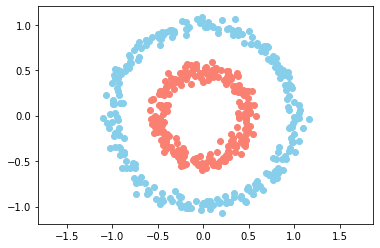

In [142]:
# Creating Dataset
n = 500  # Number of data rows
p = 2    # Number of characteristics that have each row

# X is referred to the two parameters that make the two circles
# Y is referred to the classes of each circle
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")  #Printing first class (when Y == 0)
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")  #Printing second class (when Y == 1)

plt.axis("equal")
plt.show()

Now we are going to create a class for the structure of a neural layer. This class will contain the number of connections that the neural layer has with the previous layer, the number of neurons of the actual layer and the activation function the layer will use.

In [143]:
# Neural Layer class
class neural_layer():
    
    def __init__(self, number_connections, number_neurons, act_func):
        
        self.act_func = act_func
        
        self.b = np.random.rand(1, number_neurons) * 2 - 1
        self.W = np.random.rand(number_connections, number_neurons) * 2 - 1
        

The activation function is the one who receives the ponderated sum of the parameters (that is done inside the neuron) and then it introduces no-lineality to our neural network and thus it will help to connect more neurons having a no-linear result.

**The effect of the activation function is that it distorts the plane generated by the neuron.**

In this case, we're going to use the simoid function as our activation function.

The Sigmoid function is a type of activation function that turns all the received data into a range from 0 to 1 with a particular form of an "S".

![](https://i.imgur.com/ZWaUUDum.png)

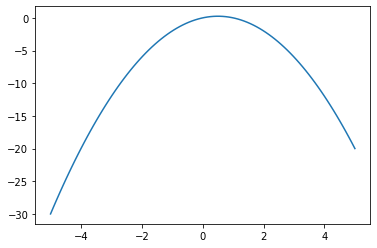

In [144]:
# Activation Function (sigmoid)
sigm = (
        lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x)
       )
#lambda x: (1 / (1 + np.e ** (-x))) * (1 - (1 / (1 + np.e ** (-x))))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [145]:
def create_nn(topology, act_f):
    
    nn = []
    
    # Generating each layer and appending to the neural network
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

In [146]:
topology = [p, 4, 8, 1]  # Topology of the neural network

neural_net = create_nn(topology, sigm)

# Cost function and its derivative
l2_cost = (
            lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
            lambda Yp, Yr: (Yp - Yr) 
           )

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    # output = [(z0, a0), (z1, a1) ... ]
    output = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = output[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_func[0](z)
        
        output.append((z, a))

    if train:
        # Backward pass
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            z = output[l+1][0]
            a = output[l+1][1]
            
            if l == len(neural_net) - 1:
                # Calculating delta of last layer
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_func[1](a))

            else:
                # Calculating delta of previous layer
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_func[1](a))
            
            _W = neural_net[l].W
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - output[l][1].T @ deltas[0] * lr
            
    return output[-1][1]


In [149]:
import time
from IPython.display import clear_output

loss = []

for i in range(2500):
    # Training the Neural Network
    pY = train(neural_net, X, Y, l2_cost, 0.02)
    
    if i % 25 == 0:
        loss.append(l2_cost[0](pY, Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")  #Printing first class (when Y == 0)
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")  #Printing second class (when Y == 1)

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)

KeyboardInterrupt: 